In [321]:
import pandas as pd
import os
import json
import re
import decimal

def extract_date(filename):
    pattern = r"\d{4}-\d{2}-\d{2}"
    match = re.search(pattern, filename)
    if match:
        return match.group(0)
    else:
        return None

# Define the directory where the JSON files are located
directory = 'podatki/'

# Initialize an empty list to store the data
data = []

# Loop over each file in the directory and extract the data
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename)) as file:
            # Extract the date from the filename
            date = extract_date(filename)
            # Load the JSON data
            jobs = json.load(file)
            # Loop over each job and add it to the data list
            for job in jobs:
                foh = job['foh']
                lokacija = job['lokacija']
                neto_number = None
                try:
                    neto_number = float(job['neto'])
                except ValueError:
                    pass
                neto = job['neto']
                data.append({'foh': foh, 'lokacija': lokacija, 'neto': neto_number, 'datum': date})

# Create a pandas DataFrame from the data
jobs = pd.DataFrame(data)
jobs_with_salary = jobs.dropna(subset=['neto'])

jobs_by_date = jobs_with_salary.groupby('datum').agg({
    'neto': ['mean', 'median', 'count'],
    'foh': ['nunique'],
})
jobs_by_date.columns


MultiIndex([('neto',    'mean'),
            ('neto',  'median'),
            ('neto',   'count'),
            ( 'foh', 'nunique')],
           )

# Statistics

In [322]:

print(f"Number of all jobs: {len(jobs)}")
number_of_null_salaries = len(jobs[jobs['neto'].isnull()])
print(f"Number of salaries with undefined salary: {number_of_null_salaries}")

Number of all jobs: 55755
Number of salaries with undefined salary: 3092


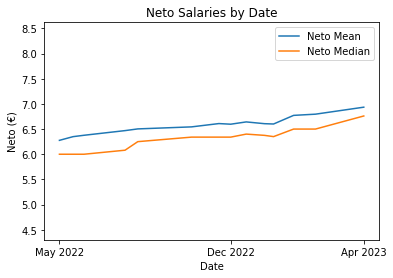

In [323]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Group the jobs_with_salary DataFrame by date and calculate the mean and median salaries
jobs_by_date = jobs_with_salary.groupby('datum').agg({'neto': ['mean', 'median', 'count'], 'foh': 'nunique'})

# Extract the 'neto' column and its mean and median values
neto_mean = jobs_by_date[('neto', 'mean')]
neto_median = jobs_by_date[('neto', 'median')]

# Calculate the interquartile range of the 'neto' column
neto_q1 = jobs_with_salary['neto'].quantile(0.25)
neto_q3 = jobs_with_salary['neto'].quantile(0.75)
neto_iqr = neto_q3 - neto_q1

# Set the y-axis limits to the 5th and 95th percentiles of the 'neto' column
y_min = max(jobs_with_salary['neto'].min(), neto_q1 - 1.5*neto_iqr)
y_max = min(jobs_with_salary['neto'].max(), neto_q3 + 1.5*neto_iqr)

# Convert the date strings to datetime objects
dates = [datetime.strptime(date_str, '%Y-%m-%d') for date_str in jobs_by_date.index]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the mean and median values as a function of time
ax.plot(dates, neto_mean, label='Neto Mean')
ax.plot(dates, neto_median, label='Neto Median')

# Set the y-axis limits based on the IQR
ax.set_ylim(y_min, y_max)

# Set the x-axis ticks to display only the first date, middle date, and last date
n_dates = len(jobs_by_date)
ax.set_xticks([dates[0], dates[n_dates//2], dates[-1]])

# Format the x-axis ticks as month names with years
date_formatter = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_formatter)

# Add axis labels and a legend
ax.set_xlabel('Date')
ax.set_ylabel('Neto (€)')
ax.set_title('Neto Salaries by Date')
ax.legend()

# Show the plot
plt.show()


In [324]:
# all possiblee datum values
possible_datum = jobs['datum'].unique()
jobs_by_date.columns

MultiIndex([('neto',    'mean'),
            ('neto',  'median'),
            ('neto',   'count'),
            ( 'foh', 'nunique')],
           )